In [1]:
#數庫中重要的，比python效率好
import numpy as np
import tensorflow as tf
#此模型使用平整層(Flatten)、密集層(Dense)、扔掉層(Dropout)
from tensorflow.keras.layers import Flatten,Dense,Dropout
#引入圖像
import matplotlib.pyplot as plt

train_x.shape: (60000, 28, 28) ,train_y.shape: (60000,)
test_x.shape: (10000, 28, 28) ,test_y.shape: (10000,)
0


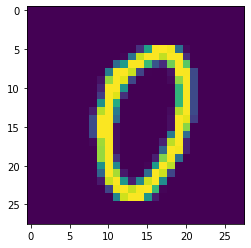

In [2]:
 #把Keras內置的學習用手寫數字數據集放入
ds=tf.keras.datasets.mnist
    
#把ds放入4個組裡面，train為訓練數組X(特徵數組)跟Y(標註1、2、8、....)，test為測試數組，模型出來時利用test數組去測試
(train_x,train_y),(test_x,test_y)=ds.load_data()
print("train_x.shape:",train_x.shape, ",train_y.shape:",train_y.shape)
print("test_x.shape:",test_x.shape,",test_y.shape:",test_y.shape)

# train_x.shape: (60000(6萬個數據(圖片)), 28, 28(每張圖片28X28像素)) ,train_y.shape: (60000(結果6萬個),) 特徵組
# test_x.shape: (10000(1萬個數據(圖片), 28, 28(每張圖片28X28像素)) ,test_y.shape: (10000(結果1萬個),) 測試組

#////////顯示數據集圖//////////////////
#顯示數據集圖n找第1000個圖
n=1000
#train_y[n]為標籤
print(train_y[n])
fig,ax=plt.subplots()
ax.imshow(train_x[n])
plt.show()
#////////////////////////////////////

In [3]:
#train_x正規化
#把像素轉化成0~1之間的數 //  像素/255
print(train_x[1000])
train_x=tf.keras.utils.normalize(train_x)
test_x=tf.keras.utils.normalize(test_x)
#print(train_x[1000])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  36 146 254 255
  251  95   6   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  97 234 254 254 232
  254 254  35   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  89 140 254 254 174  67  33
  200 254 190   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 108 253 254 235  51   

In [4]:
#one-hot
#把數字轉化成2進位，如果是0呈現 1.0.0.0.0.0.0.0.0;如果是9呈現 0.0.0.0.0.0.0.0.1
print(train_y[1000])
train_y=tf.keras.utils.to_categorical(train_y)
test_y=tf.keras.utils.to_categorical(test_y)
#print("train_y.shape:",train_y.shape,",test_y.shape:",test_y.shape)
print(train_y[1000])

0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [5]:
#模型定義(玄學)靠經驗去做調整神經數與層數
model=tf.keras.Sequential()
#把所有圖片換成一串數組
model.add(Flatten(input_shape=[28,28]))
#第一層給他1000個神經元、後面放入relu激活函數(此範例使用relu)
model.add(Dense(1000,activation="relu"))
#加第二層給他256個神經元
model.add(Dense(256,activation="relu"))
#丟掉不要的數據
model.add(Dropout(rate=0.5))
#最後用softmax激活，10代表0~9
model.add(Dense(10,activation="softmax"))

#模型結構
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 1000)              785000    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               256256    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 1,043,826
Trainable params: 1,043,826
Non-trainable params: 0
_________________________________________________________________


In [6]:
#編譯模型
#放入3個1.損失函數(losses)2.優化函數(optimizer)3.較驗方法(metrics)
model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

In [7]:
#訓練模型參數
#訓練20週期(epochs)梯度下降抓最好的次數,每次傳128個圖片訓練(batch size)==>提高效率
history=model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=20,batch_size=128)
#評分
score=model.evaluate(test_x,test_y,batch_size=128)
print("訓練分數:",score)

result=model.predict(test_x,batch_size=128)
print("原始值:",np.argmax(test_y[:20],axis=1))
print("預測值:",np.argmax(result[:20],axis=1))

#loss: 0.1031 - accuracy: 0.9800
#loss越小越好,accuracy準確率越高越好100張正確預測出98

#val_loss: 0.1031 - val_accuracy: 0.9800
#val_loss教驗損失(test_x,test_y)損失差0.1031越小越好
#val_accuracy教驗的準確率0.98越大越好

Epoch 1/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2864 - accuracy: 0.9129 - val_loss: 0.1155 - val_accuracy: 0.9644
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1073 - accuracy: 0.9678 - val_loss: 0.0827 - val_accuracy: 0.9745
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0735 - accuracy: 0.9777 - val_loss: 0.0708 - val_accuracy: 0.9783
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0519 - accuracy: 0.9841 - val_loss: 0.0759 - val_accuracy: 0.9757
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0383 - accuracy: 0.9877 - val_loss: 0.0878 - val_accuracy: 0.9736
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0320 - accuracy: 0.9899 - val_loss: 0.0705 - val_accuracy: 0.9798
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0260 - accuracy: 0.9918 - val_loss: 0.0733 - val_accuracy: 0.9810
Epoch 

In [8]:
#保存訓練模型
model_filename="./model.h5"
model.save(model_filename)